In [1]:
from tensorflow import keras
from tqdm import tqdm

Training with variating estimators

In [2]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import joblib
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

In [3]:
# Convert tensors to numpy arrays for use with scikit-learn
x_train = x_train.reshape(len(x_train), -1)

# Plot accuracy from 5 to 1000 estimators
estimators_range = range(50, 1050, 50)
train_accuracies = []
val_accuracies = []

x_train, x_eval, y_train, y_eval = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

for n_estimators in tqdm(estimators_range):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1)
    # Split the data into training, validation, and test sets
    # Train the model on the training set
    rf_model.fit(x_train, y_train)
    # Make predictions on the validation set
    val_predictions = rf_model.predict(x_eval)
    val_accuracy = accuracy_score(y_eval, val_predictions)
    val_accuracies.append(val_accuracy)
    print(f'Validation accuracy with {n_estimators} estimators: {val_accuracy}')
    # Save the best model to a file
    if len(val_accuracies) == 1 or val_accuracy == max(val_accuracies):
        best_model = rf_model
        print(f'Saving model with {n_estimators} estimators')
        joblib.dump(best_model, 'best_random_forest_model_estimator.pkl')

  5%|▌         | 1/20 [00:01<00:34,  1.80s/it]

Validation accuracy with 50 estimators: 0.9644166666666667
Saving model with 50 estimators


 10%|█         | 2/20 [00:04<00:43,  2.42s/it]

Validation accuracy with 100 estimators: 0.9676666666666667
Saving model with 100 estimators


 15%|█▌        | 3/20 [00:08<00:54,  3.22s/it]

Validation accuracy with 150 estimators: 0.9678333333333333
Saving model with 150 estimators


 20%|██        | 4/20 [00:14<01:05,  4.06s/it]

Validation accuracy with 200 estimators: 0.9694166666666667
Saving model with 200 estimators


 25%|██▌       | 5/20 [00:20<01:14,  4.94s/it]

Validation accuracy with 250 estimators: 0.9695
Saving model with 250 estimators


 30%|███       | 6/20 [00:28<01:22,  5.89s/it]

Validation accuracy with 300 estimators: 0.9693333333333334
Validation accuracy with 350 estimators: 0.96975
Saving model with 350 estimators


 40%|████      | 8/20 [00:47<01:35,  7.96s/it]

Validation accuracy with 400 estimators: 0.9688333333333333


 45%|████▌     | 9/20 [00:59<01:39,  9.04s/it]

Validation accuracy with 450 estimators: 0.9689166666666666
Validation accuracy with 500 estimators: 0.9698333333333333
Saving model with 500 estimators


 55%|█████▌    | 11/20 [01:25<01:41, 11.32s/it]

Validation accuracy with 550 estimators: 0.9689166666666666
Validation accuracy with 600 estimators: 0.97025
Saving model with 600 estimators


 65%|██████▌   | 13/20 [01:57<01:36, 13.77s/it]

Validation accuracy with 650 estimators: 0.9701666666666666


 70%|███████   | 14/20 [02:15<01:29, 14.99s/it]

Validation accuracy with 700 estimators: 0.9696666666666667


 75%|███████▌  | 15/20 [02:34<01:20, 16.14s/it]

Validation accuracy with 750 estimators: 0.9693333333333334
Validation accuracy with 800 estimators: 0.9703333333333334
Saving model with 800 estimators


 85%|████████▌ | 17/20 [03:16<00:55, 18.64s/it]

Validation accuracy with 850 estimators: 0.97


 90%|█████████ | 18/20 [03:39<00:39, 19.86s/it]

Validation accuracy with 900 estimators: 0.9696666666666667


 95%|█████████▌| 19/20 [04:03<00:21, 21.10s/it]

Validation accuracy with 950 estimators: 0.9695


100%|██████████| 20/20 [04:28<00:00, 13.40s/it]

Validation accuracy with 1000 estimators: 0.9700833333333333


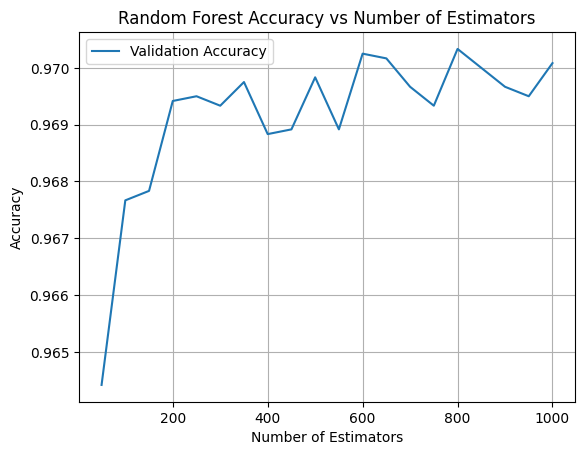

In [4]:
import matplotlib.pyplot as plt

plt.plot(estimators_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Load the best model from the file
best_model = joblib.load('best_random_forest_model.pkl')

# Reshape x_test to be a 2D array
x_test_reshaped = x_test.reshape(len(x_test), -1)

# Make predictions on the test set
test_predictions = np.argmax(best_model.predict(x_test_reshaped), axis=1)

# Evaluate the model
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')

Test Accuracy: 0.8257
Test Precision: 0.9342229591704814
Test Recall: 0.8257
Test F1 Score: 0.8543305803781821


With 650 n_estimators, the model performs best.

## Training with variating `max_depth`

In [6]:
import torch
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import joblib
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

# Convert tensors to numpy arrays for use with scikit-learn
x_train = x_train.reshape(len(x_train), -1)

# Instantiate the Random Forest model (using scikit-learn)
rf_model = RandomForestClassifier(n_estimators=100)
# Plot accuracy from 5 to 1000 estimators
max_depth_range = [2, 5, 10, 15, 20, None]
n_estimators = 150
train_accuracies = []
val_accuracies = []

x_train_np, x_eval, y_train, y_eval = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

for depth in tqdm(max_depth_range):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1, max_depth=depth)
    # Split the data into training, validation, and test sets
    # Train the model on the training set
    rf_model.fit(x_train_np, y_train)
    # Make predictions on the validation set
    val_predictions = rf_model.predict(x_eval)
    val_accuracy = accuracy_score(y_eval, val_predictions)
    val_accuracies.append(val_accuracy)
    print(f'Validation accuracy with {depth} max_depth: {val_accuracy}')
    # Save the best model to a file
    if len(val_accuracies) == 1 or val_accuracy == max(val_accuracies):
        best_model = rf_model
        print(f'Saving model with {depth} Depth')
        joblib.dump(best_model, 'best_random_forest_model_max_depth.pkl')

 17%|█▋        | 1/6 [00:01<00:05,  1.00s/it]

Validation accuracy with 2 max_depth: 0.6270833333333333
Saving model with 2 Depth


 33%|███▎      | 2/6 [00:02<00:05,  1.33s/it]

Validation accuracy with 5 max_depth: 0.8585833333333334
Saving model with 5 Depth


 50%|█████     | 3/6 [00:05<00:05,  1.99s/it]

Validation accuracy with 10 max_depth: 0.9475833333333333
Saving model with 10 Depth


 67%|██████▋   | 4/6 [00:09<00:05,  2.66s/it]

Validation accuracy with 15 max_depth: 0.96625
Saving model with 15 Depth


 83%|████████▎ | 5/6 [00:12<00:03,  3.11s/it]

Validation accuracy with 20 max_depth: 0.9691666666666666
Saving model with 20 Depth


100%|██████████| 6/6 [00:17<00:00,  2.84s/it]

Validation accuracy with None max_depth: 0.9696666666666667
Saving model with None Depth


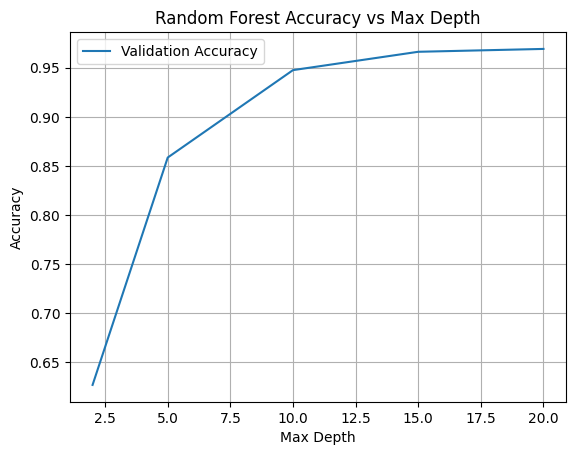

In [7]:
import matplotlib.pyplot as plt

plt.plot(max_depth_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Load the best model from the file
best_model = joblib.load('best_random_forest_model.pkl')
x_test = x_test.reshape(len(x_test), -1)

# Make predictions on the test set
test_predictions = np.argmax(best_model.predict(x_test), axis=1)

# Evaluate the model
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')

Test Accuracy: 0.8257
Test Precision: 0.9342229591704814
Test Recall: 0.8257
Test F1 Score: 0.8543305803781821


With 20 max_depth, the model performs best.

## Training with `min_samples_split`

In [20]:
import torch
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import joblib
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

# Convert tensors to numpy arrays for use with scikit-learn
x_train = x_train.reshape(len(x_train), -1)

# Instantiate the Random Forest model (using scikit-learn)
rf_model = RandomForestClassifier(n_estimators=100)
# Plot accuracy from 5 to 1000 estimators
min_samples_split_range = range(2, 40, 2)
n_estimators = 150
max_depth = 20
train_accuracies = []
val_accuracies = []

x_train, x_eval, y_train, y_eval = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

for min_sample in tqdm(min_samples_split_range):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1, max_depth=max_depth, min_samples_split=min_sample)
    # Split the data into training, validation, and test sets
    # Train the model on the training set
    rf_model.fit(x_train, y_train)
    # Make predictions on the validation set
    val_predictions = rf_model.predict(x_eval)
    val_accuracy = accuracy_score(y_eval, val_predictions)
    val_accuracies.append(val_accuracy)
    print(f'Validation accuracy with {min_sample} min_samples_split: {val_accuracy}')
    # Save the best model to a file
    if len(val_accuracies) == 1 or val_accuracy == max(val_accuracies):
        best_model = rf_model
        print(f'Saving model with {min_sample} min_samples_split')
        joblib.dump(best_model, 'best_random_forest_model_min_samples.pkl')

  5%|▌         | 1/19 [00:04<01:13,  4.08s/it]

Validation accuracy with 2 min_samples_split: 0.9685
Saving model with 2 min_samples_split


 11%|█         | 2/19 [00:08<01:07,  3.99s/it]

Validation accuracy with 4 min_samples_split: 0.9675833333333334


 16%|█▌        | 3/19 [00:11<01:02,  3.91s/it]

Validation accuracy with 6 min_samples_split: 0.9674166666666667


 21%|██        | 4/19 [00:15<00:57,  3.82s/it]

Validation accuracy with 8 min_samples_split: 0.9665


 26%|██▋       | 5/19 [00:19<00:54,  3.88s/it]

Validation accuracy with 10 min_samples_split: 0.9651666666666666


 32%|███▏      | 6/19 [00:23<00:50,  3.88s/it]

Validation accuracy with 12 min_samples_split: 0.96425


 37%|███▋      | 7/19 [00:27<00:45,  3.82s/it]

Validation accuracy with 14 min_samples_split: 0.9625


 42%|████▏     | 8/19 [00:30<00:42,  3.83s/it]

Validation accuracy with 16 min_samples_split: 0.9635


 47%|████▋     | 9/19 [00:34<00:37,  3.74s/it]

Validation accuracy with 18 min_samples_split: 0.96275


 53%|█████▎    | 10/19 [00:38<00:33,  3.68s/it]

Validation accuracy with 20 min_samples_split: 0.9615833333333333


 58%|█████▊    | 11/19 [00:41<00:29,  3.64s/it]

Validation accuracy with 22 min_samples_split: 0.9621666666666666


 63%|██████▎   | 12/19 [00:45<00:25,  3.63s/it]

Validation accuracy with 24 min_samples_split: 0.96025


 68%|██████▊   | 13/19 [00:49<00:22,  3.74s/it]

Validation accuracy with 26 min_samples_split: 0.9610833333333333


 74%|███████▎  | 14/19 [00:54<00:20,  4.13s/it]

Validation accuracy with 28 min_samples_split: 0.9594166666666667


 79%|███████▉  | 15/19 [00:57<00:15,  3.94s/it]

Validation accuracy with 30 min_samples_split: 0.9589166666666666


 84%|████████▍ | 16/19 [01:01<00:11,  3.85s/it]

Validation accuracy with 32 min_samples_split: 0.9590833333333333


 89%|████████▉ | 17/19 [01:04<00:07,  3.74s/it]

Validation accuracy with 34 min_samples_split: 0.96025


 95%|█████████▍| 18/19 [01:08<00:03,  3.64s/it]

Validation accuracy with 36 min_samples_split: 0.9595833333333333


100%|██████████| 19/19 [01:11<00:00,  3.77s/it]

Validation accuracy with 38 min_samples_split: 0.95775


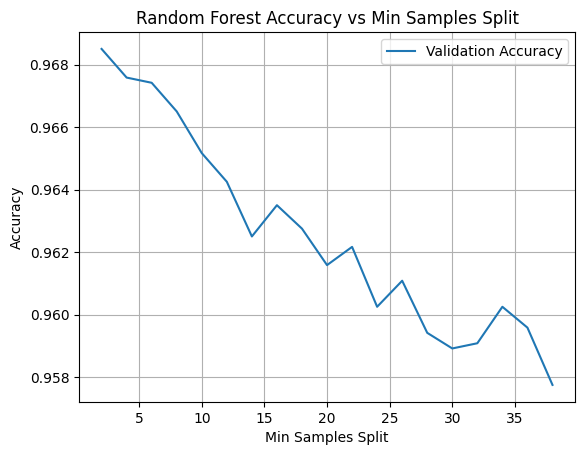

In [21]:
import matplotlib.pyplot as plt

plt.plot(min_samples_split_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Min Samples Split')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Load the best model from the file
best_model = joblib.load('best_random_forest_model_min_samples.pkl')
x_test = x_test.reshape(len(x_test), -1)

# Make predictions on the test set
test_predictions = best_model.predict(x_test)
y_test

# Evaluate the model
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')

Test Accuracy: 0.9684
Test Precision: 0.968417037827283
Test Recall: 0.9684
Test F1 Score: 0.9683809813525506


# Combining to get the best modes

In [22]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

In [35]:
# Convert tensors to numpy arrays for use with scikit-learn
x_train = x_train.reshape(len(x_train), -1)

# Plot accuracy from 5 to 1000 estimators
train_accuracies = []
val_accuracies = []

rf_model = RandomForestClassifier(n_estimators=150, max_depth= 20, min_samples_split=2, n_jobs=-1)
# Split the data into training, validation, and test sets
# Train the model on the training set
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=150, n_jobs=-1)

In [36]:
x_test = x_test.reshape(len(x_test), -1)

# Make predictions on the validation set
val_predictions = rf_model.predict(x_test)

In [37]:
val_accuracy = accuracy_score(y_test, val_predictions)
test_precision = precision_score(y_test, val_predictions, average='weighted')
test_recall = recall_score(y_test, val_predictions, average='weighted')
test_f1 = f1_score(y_test, val_predictions, average='weighted')

In [38]:
print(f'Validation accuracy: {val_accuracy}')
print(f'Validation Precision: {test_precision}')
print(f'Validation Recall: {test_recall}')
print(f'Validation F1 Score: {test_f1}')

Validation accuracy: 0.9696
Validation Precision: 0.9695990508409351
Validation Recall: 0.9696
Validation F1 Score: 0.9695861419399533


In [39]:
cross_val = cross_val_score(rf_model, x_train, y_train, cv=5)

In [40]:
print(f'Cross Validation Scores: {cross_val}')
print(f'Mean Cross Validation Score: {np.mean(cross_val)}')

Cross Validation Scores: [0.96675    0.96475    0.9635     0.96316667 0.971     ]
Mean Cross Validation Score: 0.9658333333333333


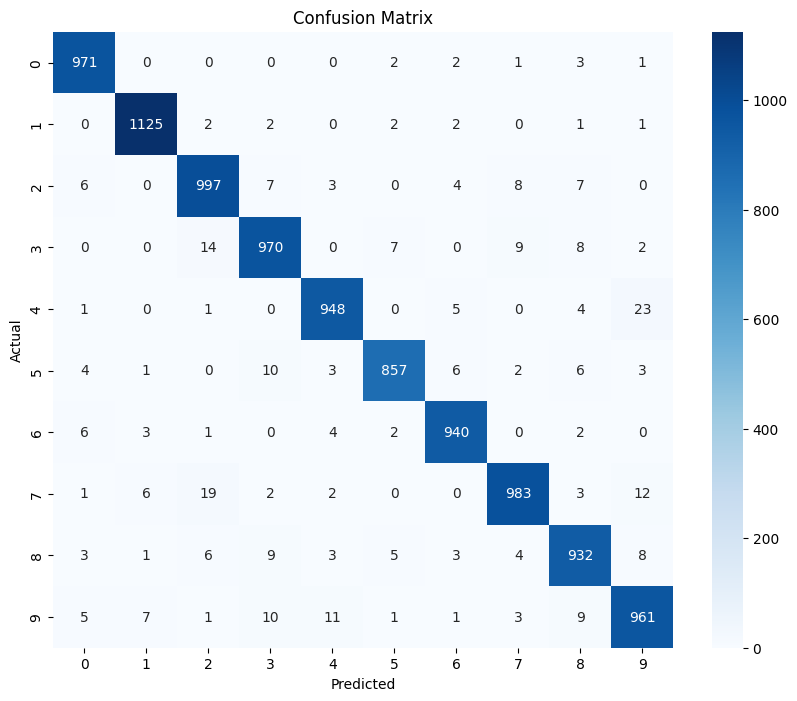

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()